In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import math
import pandas_datareader.data    as web
import plotly.express            as px
import plotly.graph_objects      as go
import pickle
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objs as go

## Question 1

Describe the importance of clustering in the domain of unsupervised machine learning. Briefly explain the 
difference between k-Means and k-Medoid clustering. Apply both methods to the chosen data set of your 
choice using machine learning models for the training and testing phases. Evaluate the modelling outcomes 
and develop at least two illustrations to highlight the similarities and contrasts.

##### Importance of Clustering in Unsupervised Machine Learning

Clustering is often thought of as a very important unsupervised learning technique for its ability to give structure to unlabelled data. It measures the similarity of data points in the same cluster and the dissimilarity of datapoints in another cluster. It is an unsupervised learning method of machine learning used on unlabelled data. (Sinaga, K.P. & Yang, M.S., 2020) 

Clustering algorithms can be classified into Hierarchical and Partitional methods. Partitional clustering, for example K-means clustering, measures the distance between datapoints and minimizes the sum of the squared errors between them and the cluster centres. (Yang, J., Parikh, D. & Batra, D., 2016)


###### K-Means & K-Medioid Clustering






Store Sales dataset in a pandas dataframe to conduct Data Analysis and Machine Learning Algorithms.

In [2]:
df = pd.read_csv("sales_data_sample.csv",encoding='Latin-1')

View first 5 rows of the Dataframe and the 25 Features available

In [3]:
df.head()

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN          Reims   NaN   
2  27 rue du Colonel Pierre Avia           NaN          Paris   NaN   
3             78934 Hillside Dr.           NaN       Pasadena    CA   
4                7734 Strong St.           NaN  San Francisco    CA   

  POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0      10022     USA       NaN              Yu             Kwai    Small  
1      51100  France      EMEA         Henriot             Paul    Small  
2      75508  France      EMEA        Da Cunha           Daniel   Medium  
3      90003     USA       NaN           Young            Julie   Medium  
4        NaN     USA       NaN           Brown            Julie   Medium  

[5 rows x 25 columns]

In order to manipulate the data we must determine what data types the features are for this dataset. 

In [4]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

There are 25 feature columns present in the dataframe

In [5]:
df.dtypes.count()

25

We can view the number of unique values present in each of the dataframe columns

In [6]:
df.nunique()

ORDERNUMBER          307
QUANTITYORDERED       58
PRICEEACH           1016
ORDERLINENUMBER       18
SALES               2763
ORDERDATE            252
STATUS                 6
QTR_ID                 4
MONTH_ID              12
YEAR_ID                3
PRODUCTLINE            7
MSRP                  80
PRODUCTCODE          109
CUSTOMERNAME          92
PHONE                 91
ADDRESSLINE1          92
ADDRESSLINE2           9
CITY                  73
STATE                 16
POSTALCODE            73
COUNTRY               19
TERRITORY              3
CONTACTLASTNAME       77
CONTACTFIRSTNAME      72
DEALSIZE               3
dtype: int64

Using isnull().sum() we can calculate the number of missing values in each of the columns and determine if they need to be dropped or imputed. There is a large number of missing values in three of the features "ADDRESSLINE2", "STATE" & "TERRITORY". We will calculate the percentage of missing values and determine if the features should be dropped.

In [7]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

By creating a variable called "percent missing" we can calculate the percentage of missing values present in the features by multiplying the total number of missing values by 100 and dividing by the length of the column we can see the percentage of missing values. Now we can decide what needs to be done about them.

In [8]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

ORDERNUMBER          0.000000
QUANTITYORDERED      0.000000
PRICEEACH            0.000000
ORDERLINENUMBER      0.000000
SALES                0.000000
ORDERDATE            0.000000
STATUS               0.000000
QTR_ID               0.000000
MONTH_ID             0.000000
YEAR_ID              0.000000
PRODUCTLINE          0.000000
MSRP                 0.000000
PRODUCTCODE          0.000000
CUSTOMERNAME         0.000000
PHONE                0.000000
ADDRESSLINE1         0.000000
ADDRESSLINE2        89.302161
CITY                 0.000000
STATE               52.639036
POSTALCODE           2.692171
COUNTRY              0.000000
TERRITORY           38.044633
CONTACTLASTNAME      0.000000
CONTACTFIRSTNAME     0.000000
DEALSIZE             0.000000
dtype: float64

As a result of missing data at the levels of around 89%, 52% & 38% for the columns  "ADDRESSLINE2", "STATE" & "TERRITORY" respectively, we will drop these features from the dataset as there is far too many missing values to keep them. The reason for this is that the data is not of immense value to the dataset in the domain of Sales data. If this data was missing from, for example, randomised clinical trials on medical drugs, there maybe a need to use methods such as multiple imputation if the variable was important to the dataset as discussed in (Jakobsen, J.C., Gluud, C., Wetterslev, J. et al. 2017)

In [9]:
df.drop(columns=['ADDRESSLINE2','STATE','TERRITORY'],inplace=True)

In [10]:
df.MSRP

0       95
1       95
2       95
3       95
4       95
        ..
2818    54
2819    54
2820    54
2821    54
2822    54
Name: MSRP, Length: 2823, dtype: int64

We can change all of the string values in the dataframe to upper case as to avoid any issues when working with the string object data types. This is done using the lambda function.  

In [11]:
df = df.applymap(lambda s: s.upper() if type(s) == str else s)

Using df.describe we can see the simple descriptive statistics for the numerical features.

In [12]:
df.describe()

ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2823.000000      2823.000000  2823.000000      2823.000000   
mean   10258.725115        35.092809    83.658544         6.466171   
std       92.085478         9.741443    20.174277         4.225841   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10180.000000        27.000000    68.860000         3.000000   
50%    10262.000000        35.000000    95.700000         6.000000   
75%    10333.500000        43.000000   100.000000         9.000000   
max    10425.000000        97.000000   100.000000        18.000000   

              SALES       QTR_ID     MONTH_ID     YEAR_ID         MSRP  
count   2823.000000  2823.000000  2823.000000  2823.00000  2823.000000  
mean    3553.889072     2.717676     7.092455  2003.81509   100.715551  
std     1841.865106     1.203878     3.656633     0.69967    40.187912  
min      482.130000     1.000000     1.000000  2003.00000    33.000000  
25%     2203.430000     2.000000     4.000000  2003.00000    68.000000  
50%     3184.800000     3.000000     8.000000  2004.00000    99.000000  
75%     4508.000000     4.000000    11.000000  2004.00000   124.000000  
max    14082.800000     4.000000    12.000000  2005.00000   214.000000

In [13]:
df.duplicated().sum()

0

## Difference between k-Means and k-Medoid clustering

K-Means and K- Medoid clustering algorithms are both unsupervised learning clustering techniques.

K-Means is differnt from K-Medioids as it takes the mean of the datapoints in the cluster to locate the centroid. So it isn't actually a datapoint itself but rather the mean of the points. The centroid is selected through randomisation depending on the number of clusters selected.

The objective of K-Medioids is to actually make the final centroids datapoints themselves. This allows the center of the K-Medioids cluster to be interpretable. The best method of K can be selected using the "Elbow method".


In [14]:
df.ORDERNUMBER.nunique()

307

In [15]:
df.index = df['ORDERNUMBER']

In [16]:
df.index.sort_values()

Int64Index([10100, 10100, 10100, 10100, 10101, 10101, 10101, 10101, 10102,
            10102,
            ...
            10425, 10425, 10425, 10425, 10425, 10425, 10425, 10425, 10425,
            10425],
           dtype='int64', name='ORDERNUMBER', length=2823)

Group the order numbers that have the same value

In [17]:
sales_df = df.groupby(level=0).sum()

In [18]:
sales_df

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  \
ORDERNUMBER                                                             
10100              40400              151     288.78               10   
10101              40404              142     284.96               10   
10102              20204               80     150.14                3   
10103             161648              541    1417.54              136   
10104             131352              443    1061.89               91   
...                  ...              ...        ...              ...   
10421              20842               75     145.70                3   
10422              20844               76     147.30                3   
10423              52115              111     394.86               15   
10424              62544              269     502.20               21   
10425             135525              427    1059.20               91   

                SALES  QTR_ID  MONTH_ID  YEAR_ID  MSRP  
ORDERNUMBER                                             
10100        12133.25       4         4     8012   363  
10101        11432.34       4         4     8012   372  
10102         6864.05       2         2     4006   155  
10103        54702.00      16        16    32048  1695  
10104        44621.96      13        13    26039  1365  
...               ...     ...       ...      ...   ...  
10421         7261.75       4        10     4010   212  
10422         6166.80       4        10     4010   155  
10423         8411.95      10        25    10025   463  
10424        35133.34      12        30    12030   681  
10425        43784.69      26        65    26065  1384  

[307 rows x 9 columns]

Create a Pairplot visualisation to view where clusters of Datapoints appear.

We use the Pairplot visualisation to get a look at the numerical features datapoints plotted on the scatterplots. For the purpose of Clustering we use the pairplot to visualise the pairwise relationship between 2 features. This way we can see from a high level where there is clusters of datapoints. 

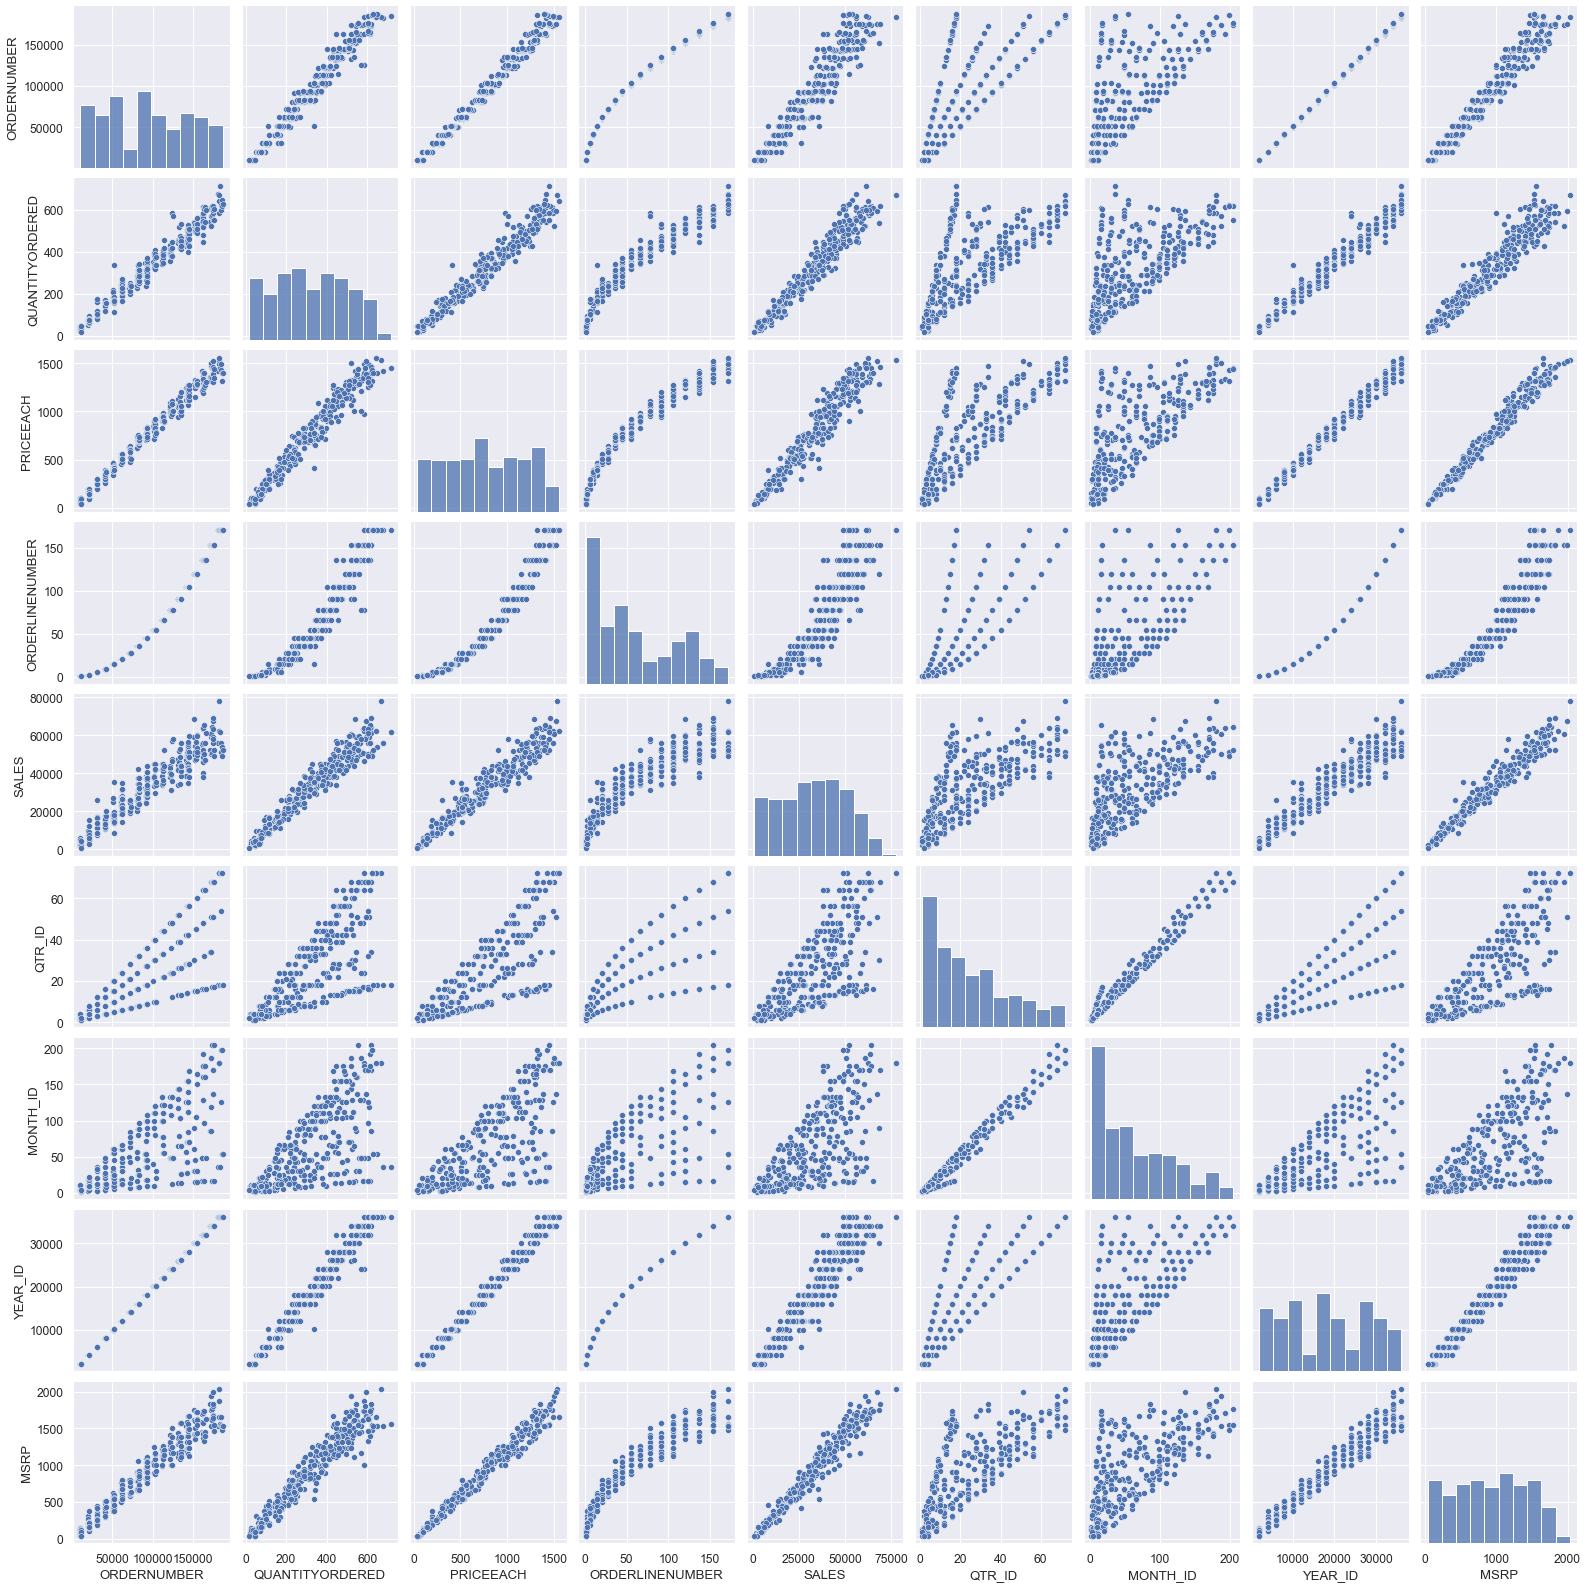

In [19]:
sns.set(font_scale=1.1)
sns.color_palette("tab10")
sns.pairplot(data=sales_df);

### Data Preprocessing 

In order to run a K-means algorithm on the data we have to transform the data by using the min max scaler.

By using the min max scaler we convert the selected columns to values between (0,1). As K-means uses Euclidean distance as a measurement tool, and the fact that KNN is higly sensitive to outlier datapoints, the column data needs to be scaled. 

In [20]:
cols_scale = ['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP']

scaler = MinMaxScaler().fit(sales_df[cols_scale])
sales_df[cols_scale] = scaler.transform(sales_df[cols_scale])

We now have a standardized numercal dataset.

In [21]:
sales_df

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  \
ORDERNUMBER                                                             
10100           0.171050         0.193732   0.165511         0.052941   
10101           0.171072         0.180912   0.163001         0.052941   
10102           0.056979         0.092593   0.074400         0.011765   
10103           0.855881         0.749288   0.907311         0.794118   
10104           0.684763         0.609687   0.673585         0.529412   
...                  ...              ...        ...              ...   
10421           0.060582         0.085470   0.071482         0.011765   
10422           0.060594         0.086895   0.072533         0.011765   
10423           0.237218         0.136752   0.235225         0.082353   
10424           0.296123         0.361823   0.305767         0.117647   
10425           0.708333         0.586895   0.671817         0.529412   

                SALES    QTR_ID  MONTH_ID   YEAR_ID      MSRP  
ORDERNUMBER                                                    
10100        0.149883  0.042254  0.014778  0.176284  0.162149  
10101        0.140811  0.042254  0.014778  0.176284  0.166667  
10102        0.081678  0.014085  0.004926  0.058761  0.057731  
10103        0.700896  0.211268  0.073892  0.881421  0.830823  
10104        0.570420  0.169014  0.059113  0.705137  0.665161  
...               ...       ...       ...       ...       ...  
10421        0.086826  0.042254  0.044335  0.058879  0.086345  
10422        0.072653  0.042254  0.044335  0.058879  0.057731  
10423        0.101715  0.126761  0.118227  0.235339  0.212349  
10424        0.447598  0.154930  0.142857  0.294159  0.321787  
10425        0.559582  0.352113  0.315271  0.705900  0.674699  

[307 rows x 9 columns]

In [22]:
sales_df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP'],
      dtype='object')

In [23]:
# using only Spending_Score and income variable for easy visualisation
X = sales_df.loc[:, ['QUANTITYORDERED', 'MONTH_ID']].values
X

array([[0.19373219, 0.01477833],
       [0.18091168, 0.01477833],
       [0.09259259, 0.00492611],
       [0.74928775, 0.07389163],
       [0.60968661, 0.0591133 ],
       [0.75498575, 0.14285714],
       [0.94017094, 0.17241379],
       [0.3048433 , 0.07389163],
       [0.77777778, 0.23152709],
       [0.28062678, 0.08374384],
       [0.79059829, 0.23152709],
       [0.28774929, 0.08374384],
       [0.05270655, 0.02463054],
       [0.18233618, 0.05418719],
       [0.47863248, 0.19211823],
       [0.27777778, 0.09359606],
       [0.01709402, 0.01477833],
       [0.55128205, 0.23152709],
       [0.02991453, 0.01477833],
       [0.60826211, 0.27093596],
       [0.72649573, 0.29064039],
       [0.24216524, 0.1182266 ],
       [0.75498575, 0.4137931 ],
       [0.2008547 , 0.09359606],
       [0.61680912, 0.31527094],
       [0.07264957, 0.04433498],
       [0.85754986, 0.4137931 ],
       [0.74786325, 0.43842365],
       [0.2022792 , 0.11330049],
       [0.47578348, 0.26108374],
       [0.

### Elbow Method

WCSS is the sum of the squared distances of each data point in all clusters to the centroids.

We create a loop in order to calculate the sum of the squared distances, fit the kmeans method to the data and append the empty list with the fitted model.

In [24]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 34)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

Using Plotly's interactive line cahert visualisation we can plot the sum of the squared distances between each point(WCSS) and the relationship between the distances and the number of clusters. The idea of the graph is to find the minimum number of clusters with the lowest squared distance between them and the K-means centroid.

For this visualisation the "simple-white" template is being used from Plotly's libraries as it is a simple graphic that does not need to be full of extra detail that would make interpretation more difficult. The interactivity of the chart allows us to scroll over the location of the elbow point at 2 clusters. There is a diminishing returns after the third cluster and the interactivity of the graph allows us to view the value at the specified cluster.

The location of the headings for the title and the x & y axes are all centered in the graph for easy interpretation.

In [25]:
fig =px.line(x=range(1,11),
             y=wcss,
             labels={'y':'WCSS',
             'x':'Number of Clusters'},
             template='simple_white',
            )
fig.update_layout(title_text='K-Means Elbow Method Plot',title_x=0.5)

Static visualisation of the Elbobow method using Seaborn's lineplot. With Seaborn we can add a marker to where the xticks are present along the x-axis.

This makes for better interpretation of the distances between datapoints and clusters

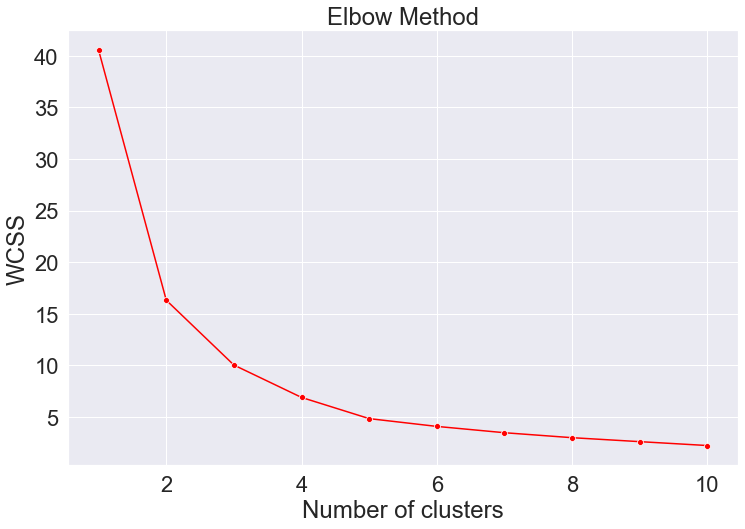

In [26]:
plt.figure(figsize=(12,8))
sns.set(font_scale=2)
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 34)
y_kmeans = kmeans.fit_predict(X)

After selecting the sizes of the number of clusters for the clustering algorithm. We can plot the datapoints with their clusters.

A scatterplot is used to show the distribution of the data points. They are colour coded to easily identify the different clusters. The center of the cluster is highlighted as the red square. The title fontsize is set to 30 in order to highlight what the graph shows. The legend details what colours correspond to each cluster. Our data is displayed between values of 0,1 due to scaling the data using min max scaler.

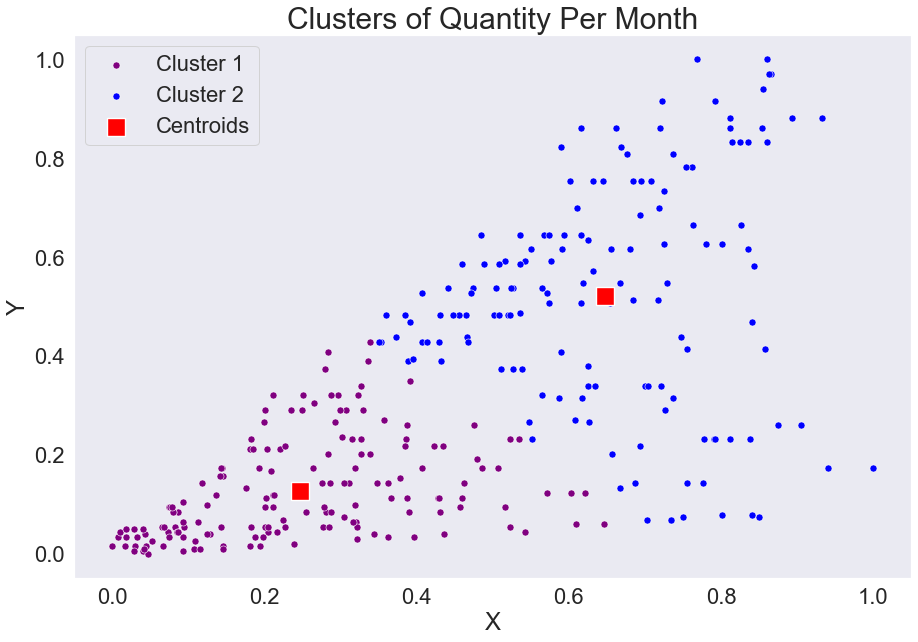

In [28]:
# Visualising the clusters
plt.figure(figsize=(15,10))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'purple', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of Quantity Per Month',fontsize=30)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Silhouette Plot

In order to evaluate the K-Mens clustering algorithm we must calculate the silhouette coefficent score. This is a method used to measure the goodness of fit of the unsupervised learning model.

A value of 1 indicates that the clusters are easily distinguishable and the clusters are well fit.

A value of -1 indicates that the clusters are assigned poorly.

We use a silhouette plot to determine the best silhouette coefficient value based on the amount of clusters applied.
Each subplot uses a different value for K and plots them against the data on the right hand side. The thickness of each silhouette represents the size of the cluster and with 2 clusters selected the silhouettes are of closest thickness and size indicating it is the best choice for the value of K.

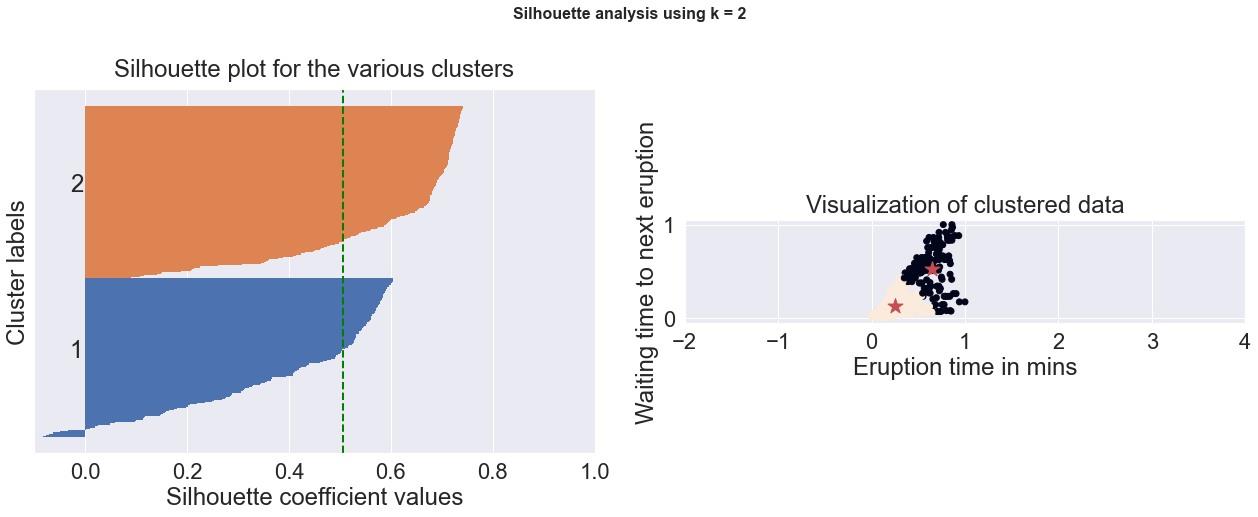

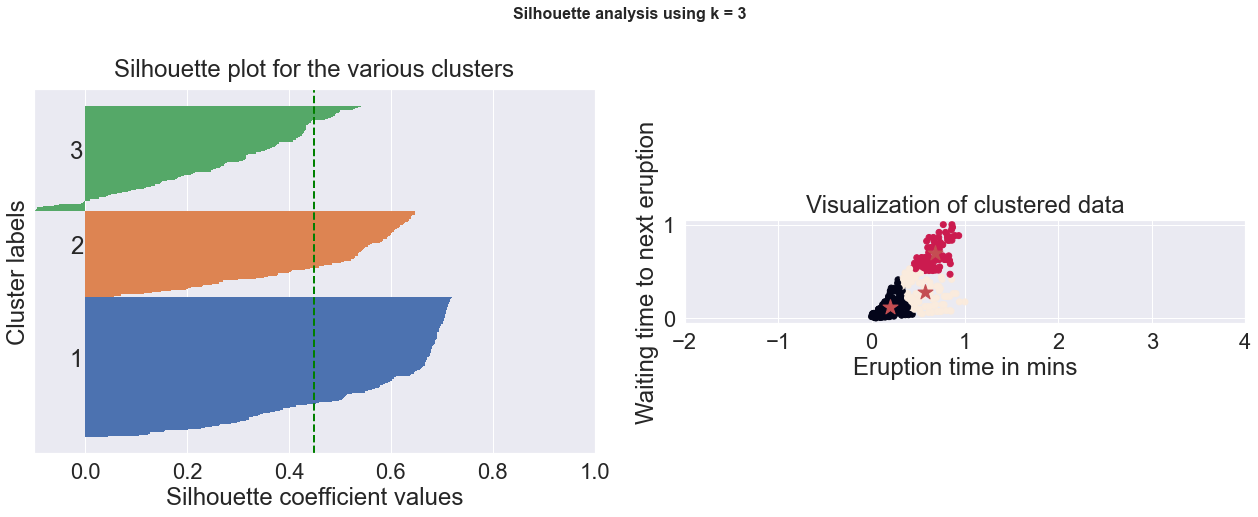

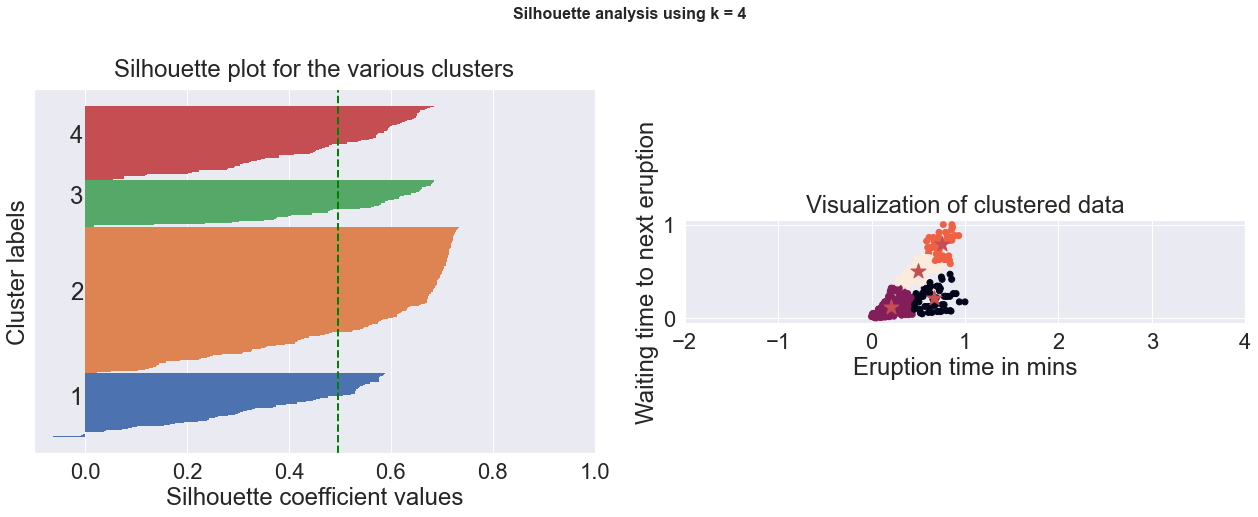

In [29]:
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X[:, 0], X[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 4])
    ax2.set_xlim([-2, 4])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

Now we can calculate the value of the silhouette coefficient and as we can see we have come up with a value of 0.5067.
Based on our evaluation of the model selecting K to equal 2 it provided us with the best coefficient score

In [30]:
print(f'Silhouette Score(n=2): {silhouette_score(X, y_kmeans)}')

Silhouette Score(n=2): 0.5067146168223703


## K-Medioids

We again select our value for K based off of the value obtained from the elbow method. And fit the K-Medoids model to it.

In [31]:
E = X[:,:2]
cluster_num=2
# model = k_medoids(k=cluster_num)
model = KMedoids(n_clusters = 2, random_state = 0)
centers = model.fit(E)
print(centers)

KMedoids(n_clusters=2, random_state=0)


Here we display the Unsupervised clustering model side by side for comparison reasons. We can visualise the K-Means datapoints versus what the K-Medoids model predicted. The colours of the clusters are inverted on the second visualisation to show the differences in the modelling techniques. Our data is displayed between values of 0,1 due to scaling the data using min max scaler

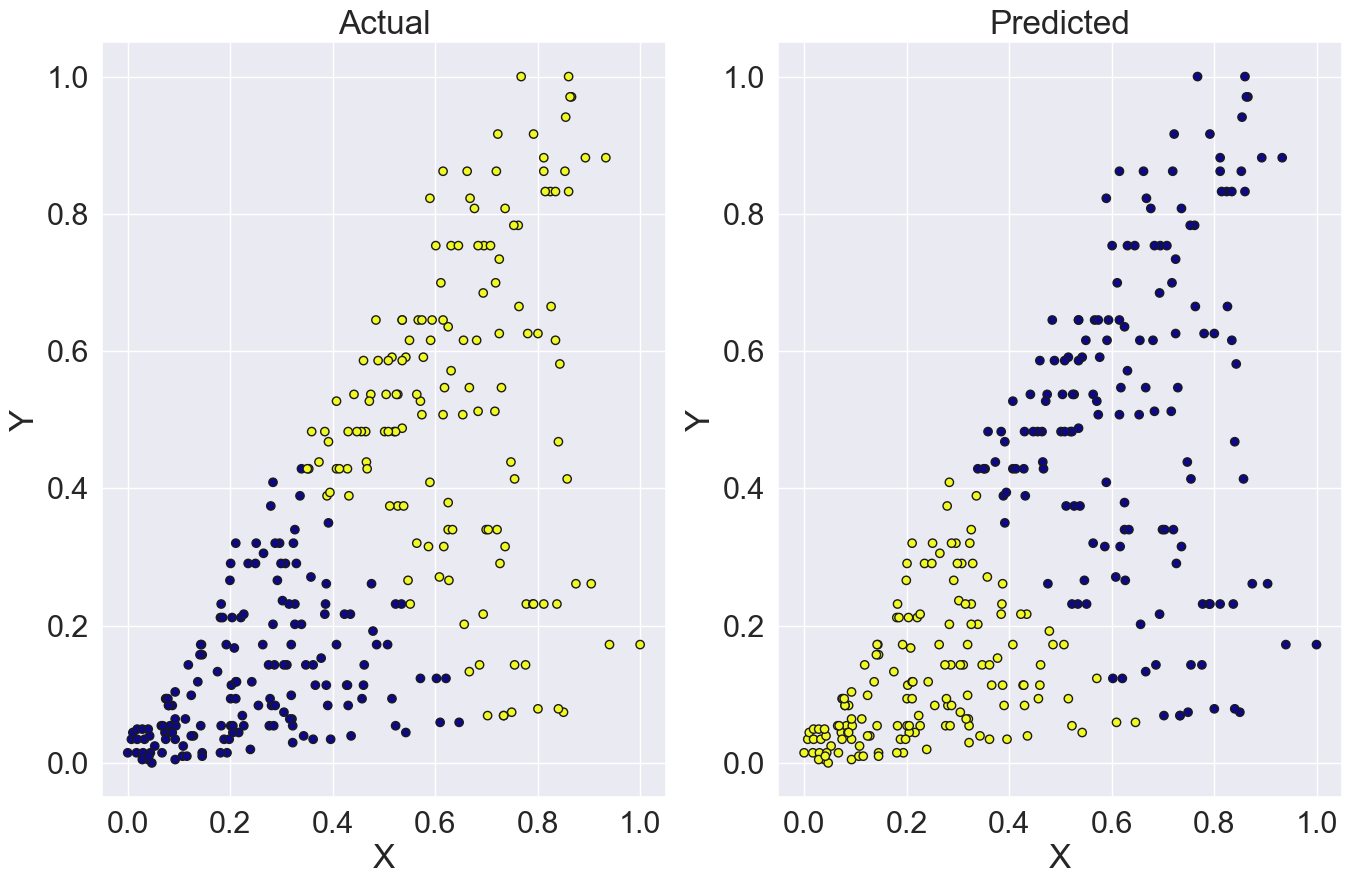

In [32]:
new_labels = model.predict(E)
# Plot the identified clusters and compare with our result
fig, axes = plt.subplots(1, 2, figsize=(16,10),dpi=100)
axes[0].scatter(E[:, 0], E[:, 1], c=y_kmeans, cmap='plasma', edgecolor='k')
axes[1].scatter(E[:, 0], E[:, 1], c=new_labels, cmap='plasma', edgecolor='k')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[0].set_title('Actual')
axes[1].set_title('Predicted');

### Silhouette Plot

Next we evaluate the model using the silhouette coefficient. From our silhouette plot we can see that again using 2 clusters will provide uswith the best silhouette score for the k-medoids model.

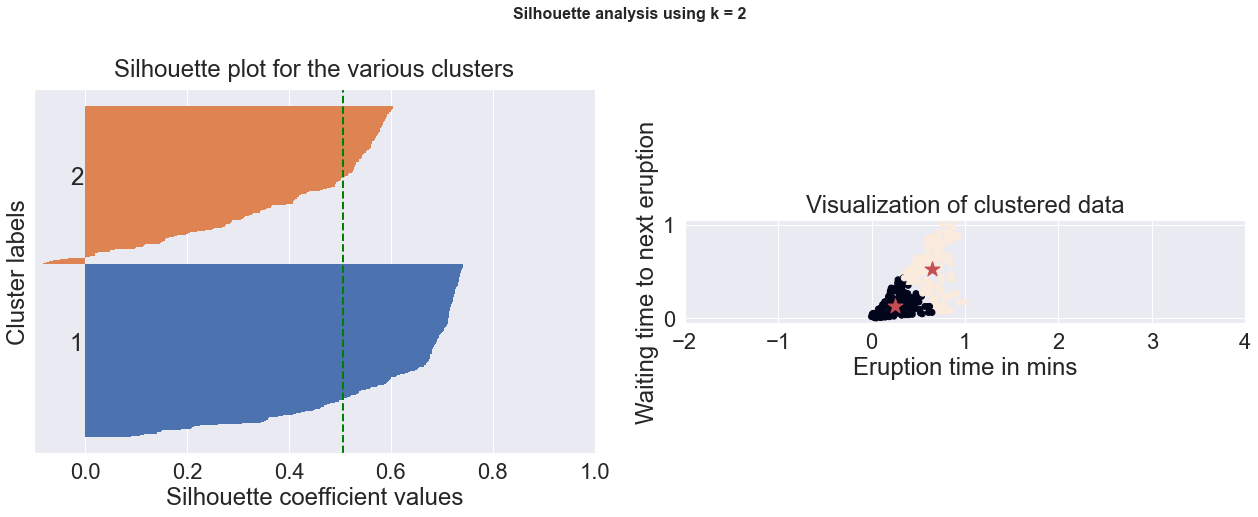

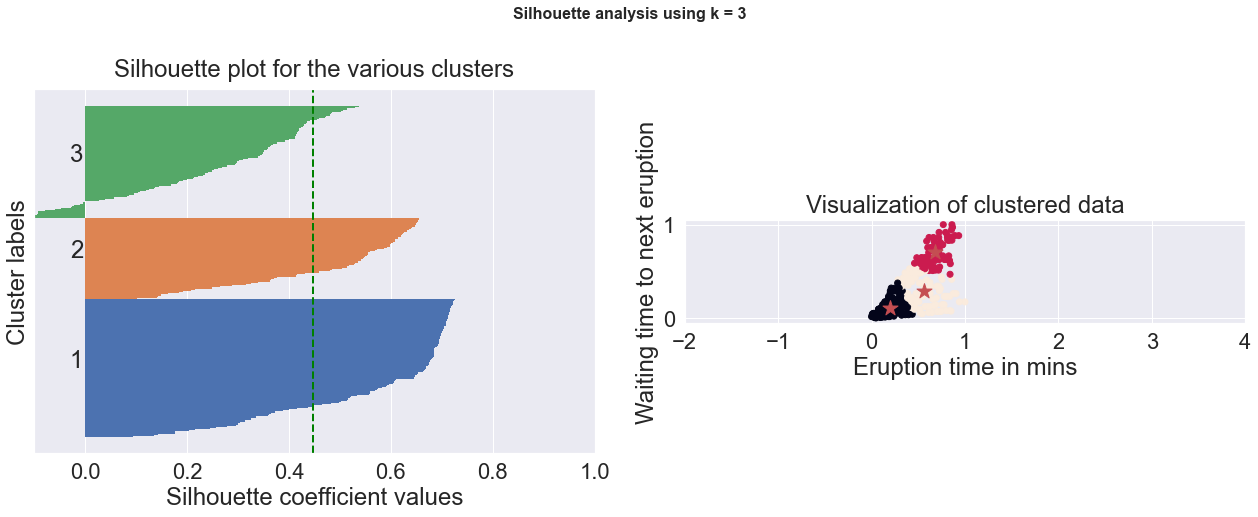

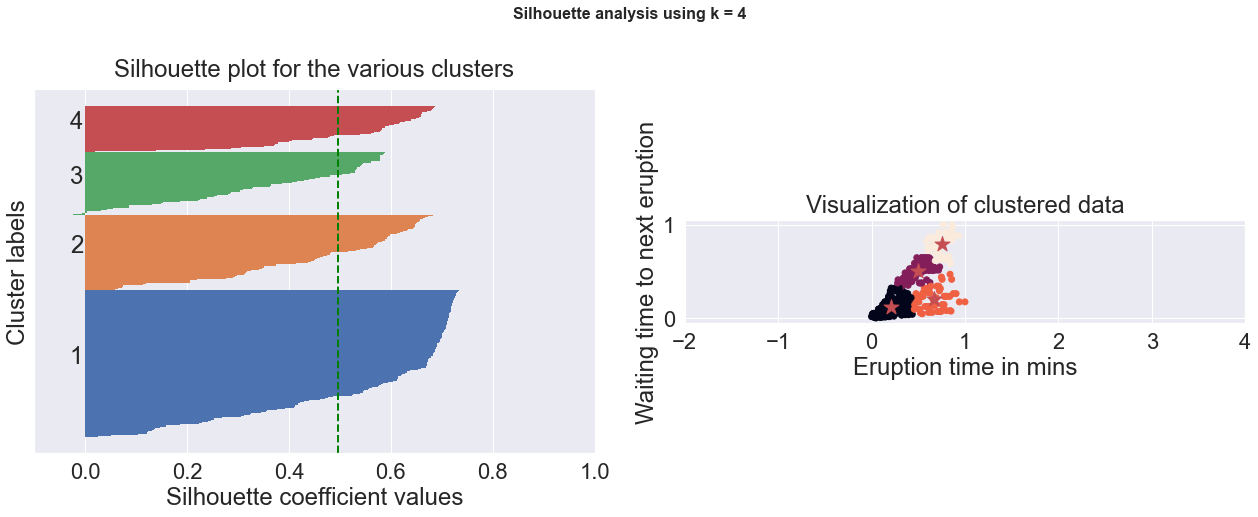

In [33]:
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(E)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(E, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(E[:, 0], E[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 4])
    ax2.set_xlim([-2, 4])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

The silhouette score for the K-Medoids is quite close to the Score for the K-means model, indicating that the k-means model has performed better than the K-Medoids model.

In [34]:
print(f'K-Medoids Silhouette Score(n=2): {silhouette_score(E, new_labels)}')

K-Medoids Silhouette Score(n=2): 0.5050786731818409


In [35]:
print(f'K-Means Silhouette Score(n=2): {silhouette_score(X, y_kmeans)}')

K-Means Silhouette Score(n=2): 0.5067146168223703
